<a href="https://colab.research.google.com/github/Pritam-Mondal18/Machine-Learning-yt/blob/main/end_to_end_ml_project_workFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# Preprocessing


In [22]:
df = df.iloc[:,1:]
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


#EDA

Text(0.5, 1.0, 'placement vs cgpa')

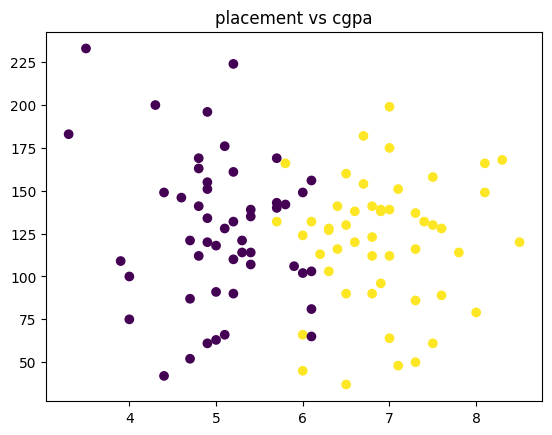

In [29]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.title('placement vs cgpa')

# sns.barplot(x='placement',y='cgpa',data=df)
# plt.title('placement vs cgpa')

# Extract input and output values

In [44]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

# Train and Split

In [66]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [65]:
x_train.shape


(90, 2)

# Scale the values

In [68]:
scaler = StandardScaler()

In [70]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.74831526, -0.82336717],
       [ 0.04493799, -1.94237289],
       [ 2.06714762,  1.11624274],
       [ 0.30870447,  0.0967042 ],
       [-0.57051711, -0.05249656],
       [ 2.24299194, -0.07736336],
       [ 1.18792604, -1.81803892],
       [ 0.13286015,  0.81784122],
       [ 1.62753683, -0.22656412],
       [-0.13090632,  0.4697061 ],
       [ 0.83623741, -0.67416641],
       [-0.83428359, -0.79850038],
       [ 0.22078231, -0.25143091],
       [ 0.74831526, -0.00276298],
       [-2.15311596,  2.73258433],
       [-0.65843927, -0.3260313 ],
       [-1.0101279 ,  1.14110953],
       [-0.92220575,  1.81251296],
       [-1.0101279 , -0.27629771],
       [-1.09805006, -1.76830533],
       [ 0.92415957,  1.88711334],
       [-0.92220575, -0.07736336],
       [ 1.36377036,  0.8675748 ],
       [ 1.36377036, -1.54450419],
       [ 0.30870447,  0.12157099],
       [ 1.01208173, -1.8677725 ],
       [-1.44973869,  1.91198014],
       [-0.65843927, -0.82336717],
       [-0.21882848,

In [71]:
x_test = scaler.transform(x_test)
x_test

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[  4.7,  87. ],
       [  8.1, 166. ],
       [  5.1, 176. ],
       [  5.4, 114. ],
       [  6. , 124. ],
       [  6.7, 182. ],
       [  7.5, 130. ],
       [  6.5,  90. ],
       [  7.6, 128. ],
       [  6.1,  81. ]])

# Train Model

In [73]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

# Evaluate the model/Model Selection

In [74]:
y_pred = clf.predict(x_test)

In [77]:
y_pred.shape

(10,)

In [78]:
y_test.shape

(10,)

In [85]:
accuracy_score(y_test,y_pred)

0.7

<Axes: >

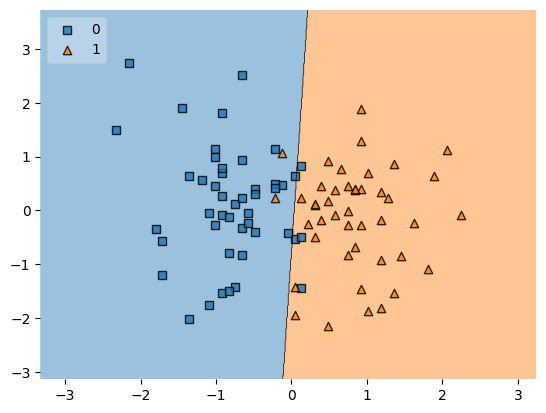

In [87]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

# Deploy the model

In [88]:
import pickle

pickle.dump(clf,open('model.pkl','wb'))